<a href="https://colab.research.google.com/github/manjunath1005/Data_Analysis/blob/main/Walmart_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are hired as a Junior Data Analyst at Walmart.
Your job is to analyze sales patterns across stores and departments to help management make data-driven decisions.
You are given multiple datasets (features.csv, sales.csv, stores.csv).
You must merge and analyze them to extract useful insights.

**Task 1** — Data Loading, Merging & Initial Inspection

Load all required CSV files into your notebook.

Merge them into one dataset using Store, Dept, and Date.

Display the first and last 10 rows.

Print:

.shape

.info()

.describe()

Identify:

Numerical columns

Categorical columns

Date columns

List all unique store types and departments.

Identify which columns may require cleaning or type conversion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/features.csv"
path2="/content/drive/MyDrive/Colab Notebooks/stores.csv"
path3="/content/drive/MyDrive/Colab Notebooks/train.csv"
df=pd.read_csv(path)
df2=pd.read_csv(path2)
df3=pd.read_csv(path3)


In [ ]:
display(df)
display(df2)
display(df3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
merged_df = pd.merge(df3, df, on=['Store', 'Date', 'IsHoliday'], how='inner')
merged_df = pd.merge(merged_df, df2, on='Store', how='inner')
print("DataFrames merged successfully into 'merged_df'.")

DataFrames merged successfully into 'merged_df'.


In [ ]:
print("First 10 rows of merged_df:")
display(merged_df.head(10))

print("Last 10 rows of merged_df:")
display(merged_df.tail(10))

First 10 rows of merged_df:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


Last 10 rows of merged_df:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421560,45,98,2012-08-24,415.40,False,72.62,3.834,7936.20,58.38,22.00,5518.07,2291.97,191.344887,8.684,B,118221
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221
421562,45,98,2012-09-07,352.44,True,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,B,118221
421563,45,98,2012-09-14,605.96,False,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,191.699850,8.684,B,118221
421564,45,98,2012-09-21,467.30,False,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684,B,118221
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
print("Shape of merged_df:")
print(merged_df.shape)

print("\nInfo of merged_df:")
merged_df.info()

print("\nDescriptive statistics of merged_df:")
display(merged_df.describe())

Shape of merged_df:
(421570, 16)

Info of merged_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), obje

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = merged_df.select_dtypes(include=['object', 'bool']).columns.tolist()
date_cols = ['Date'] # Identified from .info() as object, but represents date

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Date Columns:", date_cols)

Numerical Columns: ['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
Categorical Columns: ['Date', 'IsHoliday', 'Type']
Date Columns: ['Date']


In [ ]:
print("Unique Store Types:")
print(merged_df['Type'].unique())

print("\nUnique Departments:")
print(merged_df['Dept'].unique())

Unique Store Types:
['A' 'B' 'C']

Unique Departments:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


Task 2 — Data Cleaning

Identify missing values using .isnull().sum().

Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.

Fill missing markdown-related fields with mean values.

Convert Date column to datetime format.

Remove duplicate rows.

Reset the index after cleaning.

In [ ]:
print("Missing values in merged_df:")
print(merged_df.isnull().sum())

Missing values in merged_df:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


In [ ]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    if merged_df[col].isnull().any():
        mean_val = merged_df[col].mean()
        merged_df[col] = merged_df[col].fillna(mean_val)
        print(f"Missing values in '{col}' filled with mean: {mean_val:.2f}")

print("\nMissing values after MarkDown imputation:")
print(merged_df.isnull().sum())


Missing values after MarkDown imputation:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Type                 0
Size                 0
Total_MarkDown       0
Year                 0
Month                0
Week                 0
discount_effect      0
is_peak_season       0
normalized_sales     0
revenue_potential    0
dtype: int64


In [ ]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    if merged_df[col].isnull().any():
        mean_val = merged_df[col].mean()
        merged_df[col] = merged_df[col].fillna(mean_val)
        print(f"Missing values in '{col}' filled with mean: {mean_val:.2f}")

numerical_cols_to_impute_median = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in numerical_cols_to_impute_median:
    if merged_df[col].isnull().any():
        median_val = merged_df[col].median()
        merged_df[col] = merged_df[col].fillna(median_val)
        print(f"Missing values in '{col}' filled with median: {median_val:.2f}")

print("\nMissing values after all numerical imputation:")
print(merged_df.isnull().sum())


Missing values after all numerical imputation:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
print("Date column converted to datetime format.")
print(merged_df['Date'].head())

Date column converted to datetime format.
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]


In [ ]:
initial_rows = merged_df.shape[0]
merged_df.drop_duplicates(inplace=True)
rows_after_deduplication = merged_df.shape[0]
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after removing duplicates: {rows_after_deduplication}")
if initial_rows - rows_after_deduplication > 0:
    print(f"{initial_rows - rows_after_deduplication} duplicate rows were removed.")
else:
    print("No duplicate rows found.")

Initial number of rows: 421570
Number of rows after removing duplicates: 421570
No duplicate rows found.


In [ ]:
merged_df.reset_index(drop=True, inplace=True)
print("DataFrame index reset.")
print(merged_df.head())

DataFrame index reset.
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

     MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5  \
0  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
1  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
2  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
3  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
4  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   

          CPI  Unemployment Type    Size  
0  211.096358         8.106    A  1513

Task 3 — Outlier Detection & Treatment

Detect outliers in:

Weekly_Sales

Temperature

Fuel_Price

CPI

Use:

Boxplots

IQR method

Identify if extreme sales spikes occur during holiday weeks.

Decide which outliers should be:

Removed
Capped
Kept as business outliers

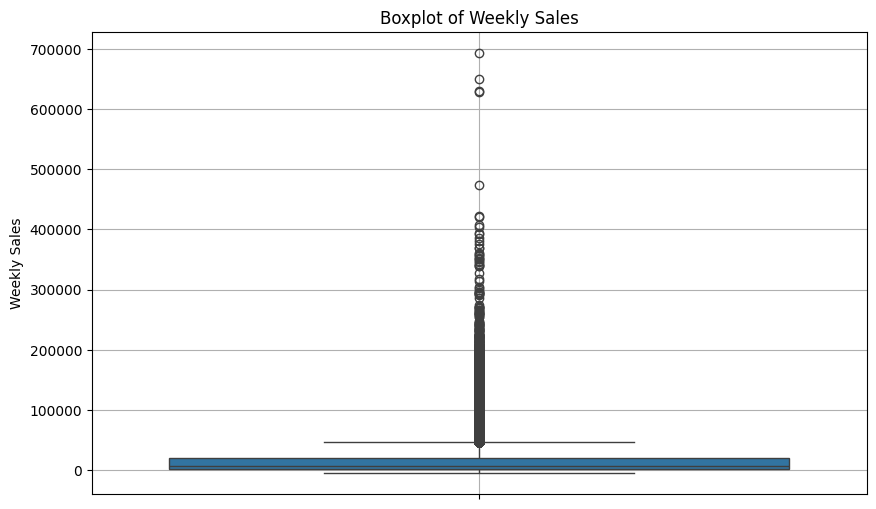

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [ ]:
Q1 = merged_df['Weekly_Sales'].quantile(0.25)
Q3 = merged_df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_weekly_sales = merged_df[(merged_df['Weekly_Sales'] < lower_bound) | (merged_df['Weekly_Sales'] > upper_bound)]

print(f"Q1 (Weekly_Sales): {Q1:.2f}")
print(f"Q3 (Weekly_Sales): {Q3:.2f}")
print(f"IQR (Weekly_Sales): {IQR:.2f}")
print(f"Lower Bound (Weekly_Sales): {lower_bound:.2f}")
print(f"Upper Bound (Weekly_Sales): {upper_bound:.2f}")

print(f"\nTotal number of outliers in Weekly_Sales: {len(outliers_weekly_sales)}")
print("First 5 Weekly_Sales outliers (values only):")
print(outliers_weekly_sales['Weekly_Sales'].head().tolist())

Q1 (Weekly_Sales): 2079.65
Q3 (Weekly_Sales): 20205.85
IQR (Weekly_Sales): 18126.20
Lower Bound (Weekly_Sales): -25109.65
Upper Bound (Weekly_Sales): 47395.16

Total number of outliers in Weekly_Sales: 35521
First 5 Weekly_Sales outliers (values only):
[57258.43, 55931.23, 50510.31, 54060.1, 57592.12]


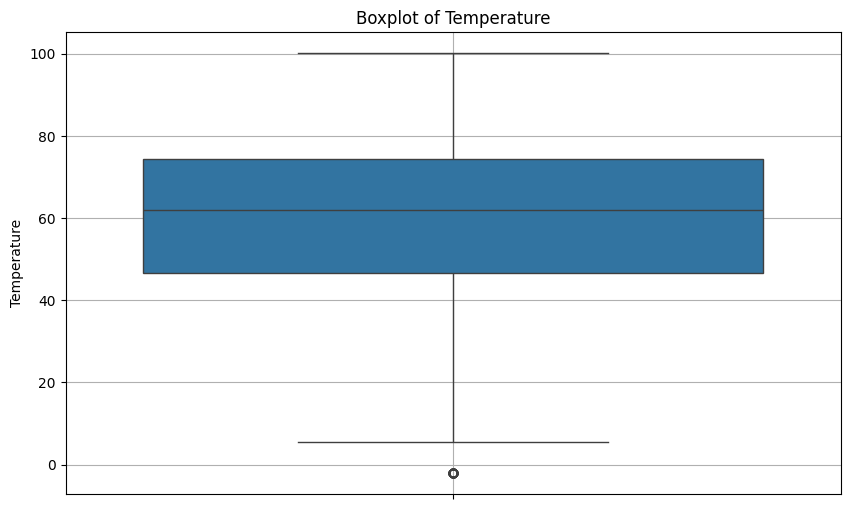

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Temperature'])
plt.title('Boxplot of Temperature')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [ ]:
Q1_temp = merged_df['Temperature'].quantile(0.25)
Q3_temp = merged_df['Temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp

lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

outliers_temperature = merged_df[(merged_df['Temperature'] < lower_bound_temp) | (merged_df['Temperature'] > upper_bound_temp)]

print(f"Q1 (Temperature): {Q1_temp:.2f}")
print(f"Q3 (Temperature): {Q3_temp:.2f}")
print(f"IQR (Temperature): {IQR_temp:.2f}")
print(f"Lower Bound (Temperature): {lower_bound_temp:.2f}")
print(f"Upper Bound (Temperature): {upper_bound_temp:.2f}")

print(f"\nTotal number of outliers in Temperature: {len(outliers_temperature)}")
print("First 5 Temperature outliers (values only):")
print(outliers_temperature['Temperature'].head().tolist())

Q1 (Temperature): 46.68
Q3 (Temperature): 74.28
IQR (Temperature): 27.60
Lower Bound (Temperature): 5.28
Upper Bound (Temperature): 115.68

Total number of outliers in Temperature: 69
First 5 Temperature outliers (values only):
[-2.06, -2.06, -2.06, -2.06, -2.06]


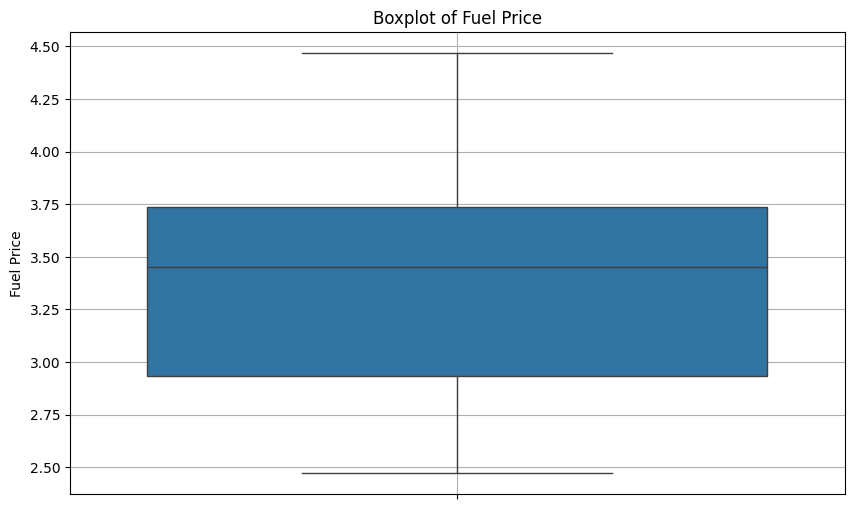

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Fuel_Price'])
plt.title('Boxplot of Fuel Price')
plt.ylabel('Fuel Price')
plt.grid(True)
plt.show()

In [ ]:
Q1_fuel = merged_df['Fuel_Price'].quantile(0.25)
Q3_fuel = merged_df['Fuel_Price'].quantile(0.75)
IQR_fuel = Q3_fuel - Q1_fuel

lower_bound_fuel = Q1_fuel - 1.5 * IQR_fuel
upper_bound_fuel = Q3_fuel + 1.5 * IQR_fuel

outliers_fuel_price = merged_df[(merged_df['Fuel_Price'] < lower_bound_fuel) | (merged_df['Fuel_Price'] > upper_bound_fuel)]

print(f"Q1 (Fuel_Price): {Q1_fuel:.2f}")
print(f"Q3 (Fuel_Price): {Q3_fuel:.2f}")
print(f"IQR (Fuel_Price): {IQR_fuel:.2f}")
print(f"Lower Bound (Fuel_Price): {lower_bound_fuel:.2f}")
print(f"Upper Bound (Fuel_Price): {upper_bound_fuel:.2f}")

print(f"\nTotal number of outliers in Fuel_Price: {len(outliers_fuel_price)}")
print("First 5 Fuel_Price outliers (values only):")
print(outliers_fuel_price['Fuel_Price'].head().tolist())

Q1 (Fuel_Price): 2.93
Q3 (Fuel_Price): 3.74
IQR (Fuel_Price): 0.81
Lower Bound (Fuel_Price): 1.73
Upper Bound (Fuel_Price): 4.95

Total number of outliers in Fuel_Price: 0
First 5 Fuel_Price outliers (values only):
[]


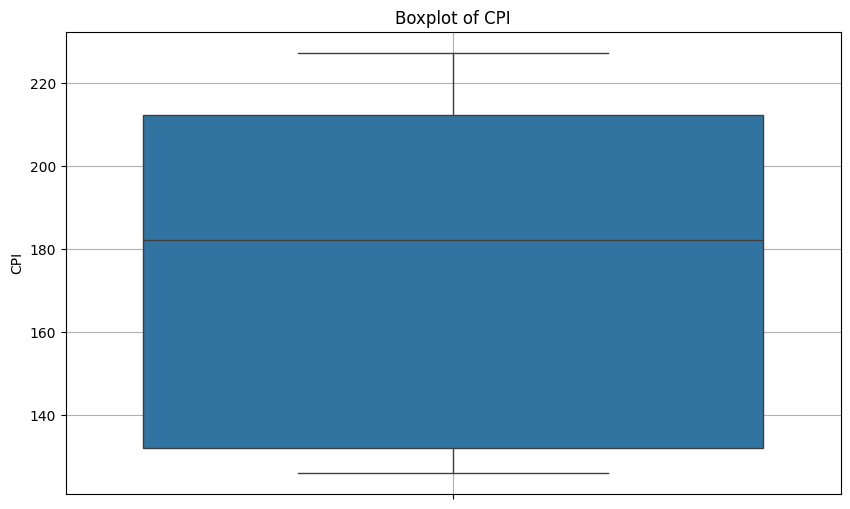

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['CPI'])
plt.title('Boxplot of CPI')
plt.ylabel('CPI')
plt.grid(True)
plt.show()

In [ ]:
Q1_cpi = merged_df['CPI'].quantile(0.25)
Q3_cpi = merged_df['CPI'].quantile(0.75)
IQR_cpi = Q3_cpi - Q1_cpi

lower_bound_cpi = Q1_cpi - 1.5 * IQR_cpi
upper_bound_cpi = Q3_cpi + 1.5 * IQR_cpi

outliers_cpi = merged_df[(merged_df['CPI'] < lower_bound_cpi) | (merged_df['CPI'] > upper_bound_cpi)]

print(f"Q1 (CPI): {Q1_cpi:.2f}")
print(f"Q3 (CPI): {Q3_cpi:.2f}")
print(f"IQR (CPI): {IQR_cpi:.2f}")
print(f"Lower Bound (CPI): {lower_bound_cpi:.2f}")
print(f"Upper Bound (CPI): {upper_bound_cpi:.2f}")

print(f"\nTotal number of outliers in CPI: {len(outliers_cpi)}")
print("First 5 CPI outliers (values only):")
print(outliers_cpi['CPI'].head().tolist())

Q1 (CPI): 132.02
Q3 (CPI): 212.42
IQR (CPI): 80.39
Lower Bound (CPI): 11.43
Upper Bound (CPI): 333.01

Total number of outliers in CPI: 0
First 5 CPI outliers (values only):
[]


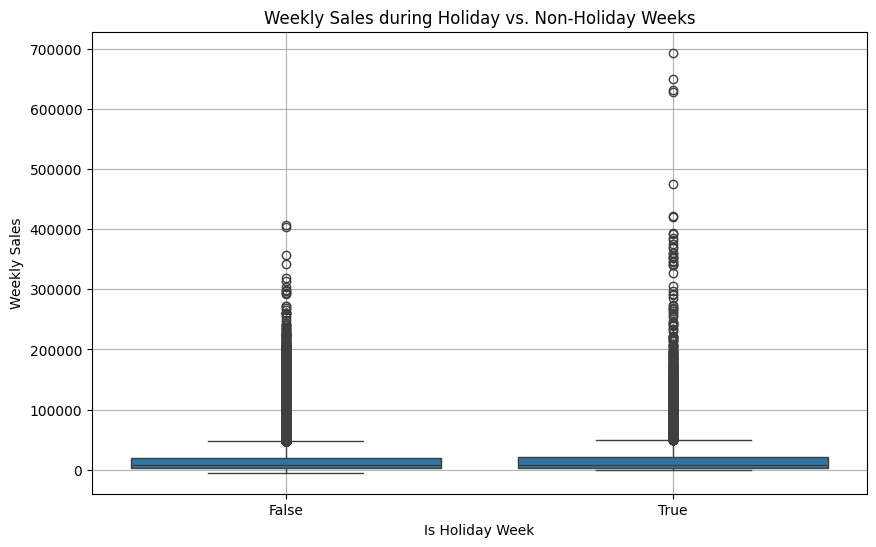

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=merged_df)
plt.title('Weekly Sales during Holiday vs. Non-Holiday Weeks')
plt.xlabel('Is Holiday Week')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [ ]:
print("Weekly Sales Statistics during Holiday vs. Non-Holiday Weeks:")
print(merged_df.groupby('IsHoliday')['Weekly_Sales'].agg(['mean', 'median', 'max', 'min']))

# Quantify the spike
holiday_sales_mean = merged_df[merged_df['IsHoliday'] == True]['Weekly_Sales'].mean()
non_holiday_sales_mean = merged_df[merged_df['IsHoliday'] == False]['Weekly_Sales'].mean()

print(f"\nAverage Weekly Sales on Holiday Weeks: {holiday_sales_mean:.2f}")
print(f"Average Weekly Sales on Non-Holiday Weeks: {non_holiday_sales_mean:.2f}")

if non_holiday_sales_mean != 0:
    percentage_increase = ((holiday_sales_mean - non_holiday_sales_mean) / non_holiday_sales_mean) * 100
    print(f"Weekly Sales are approximately {percentage_increase:.2f}% higher on average during Holiday Weeks compared to Non-Holiday Weeks.")
else:
    print("Cannot calculate percentage increase as non-holiday sales mean is zero.")

Weekly Sales Statistics during Holiday vs. Non-Holiday Weeks:
                   mean   median        max      min
IsHoliday                                           
False      15901.445069  7589.95  406988.63 -4988.94
True       17035.823187  7947.74  693099.36  -798.00

Average Weekly Sales on Holiday Weeks: 17035.82
Average Weekly Sales on Non-Holiday Weeks: 15901.45
Weekly Sales are approximately 7.13% higher on average during Holiday Weeks compared to Non-Holiday Weeks.


Task 4 — Univariate Analysis

Perform univariate analysis (one variable at a time):

Weekly sales distribution (Histogram + KDE).

Store type distribution (Count plot).

Distribution of Temperature, Fuel Price, CPI, Unemployment.

Distribution of sales during:

Holiday weeks

Non-holiday weeks

Identify top 10 departments by average weekly sales.

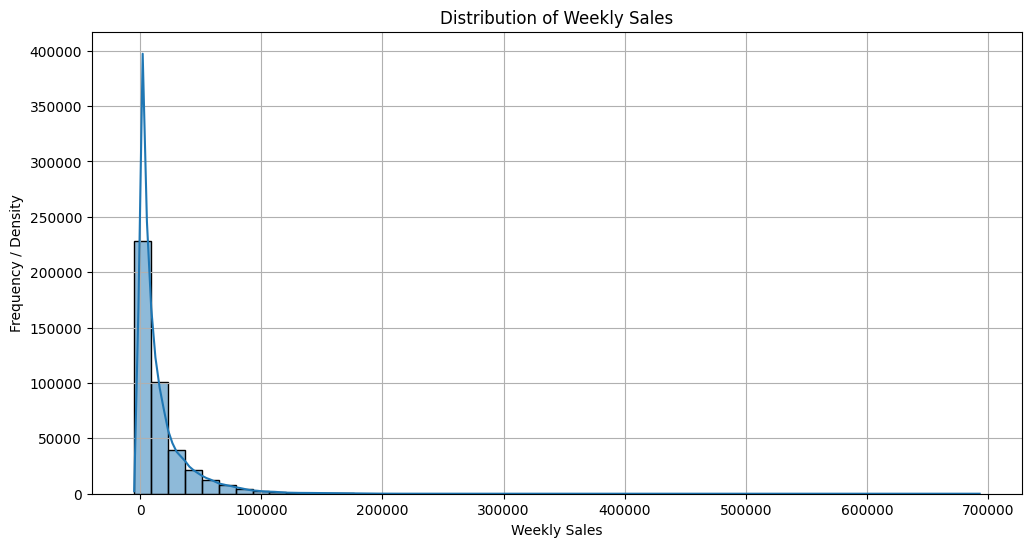

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Weekly_Sales'], kde=True, bins=50)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

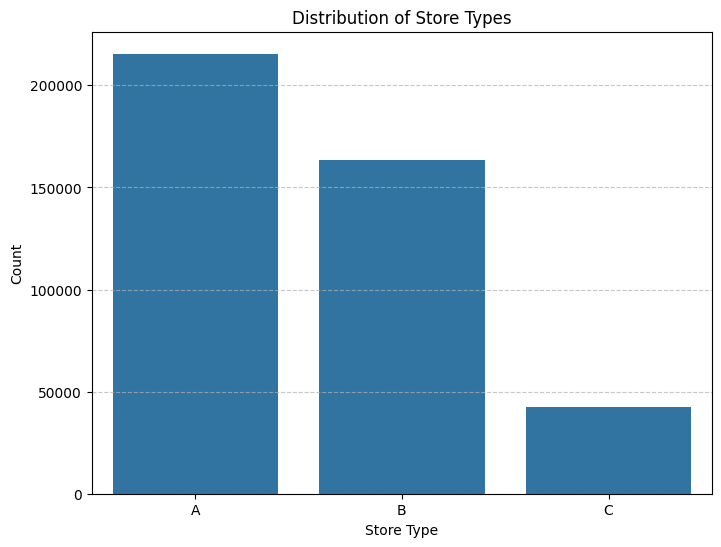

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=merged_df)
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

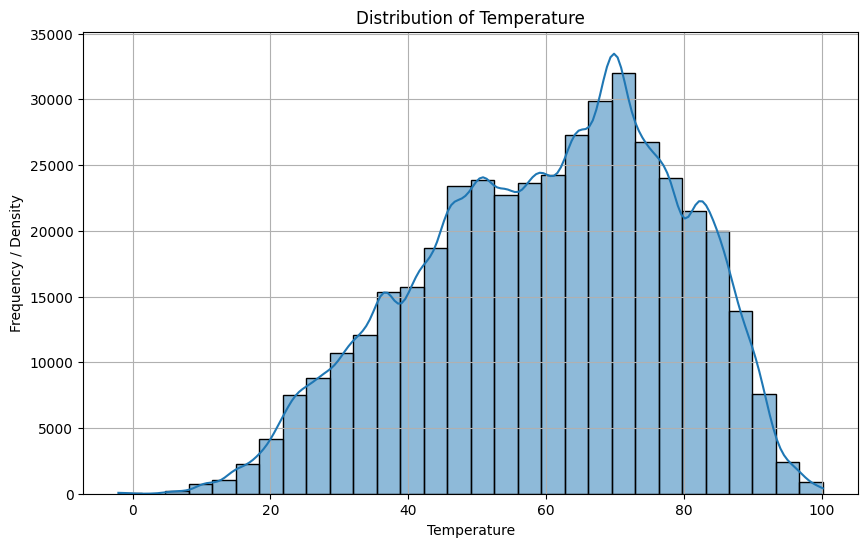

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Temperature'], kde=True, bins=30) # Using bins=30 for better visualization
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

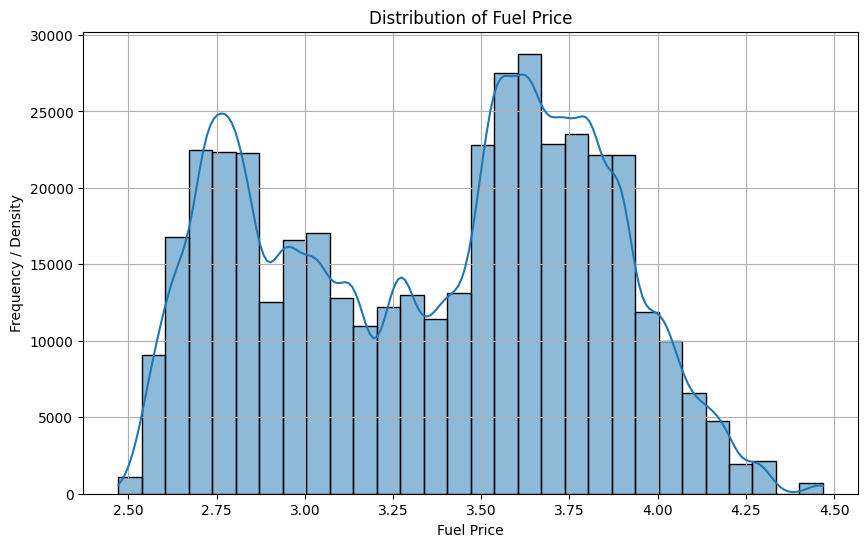

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Fuel_Price'], kde=True, bins=30) # Using bins=30 for better visualization
plt.title('Distribution of Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

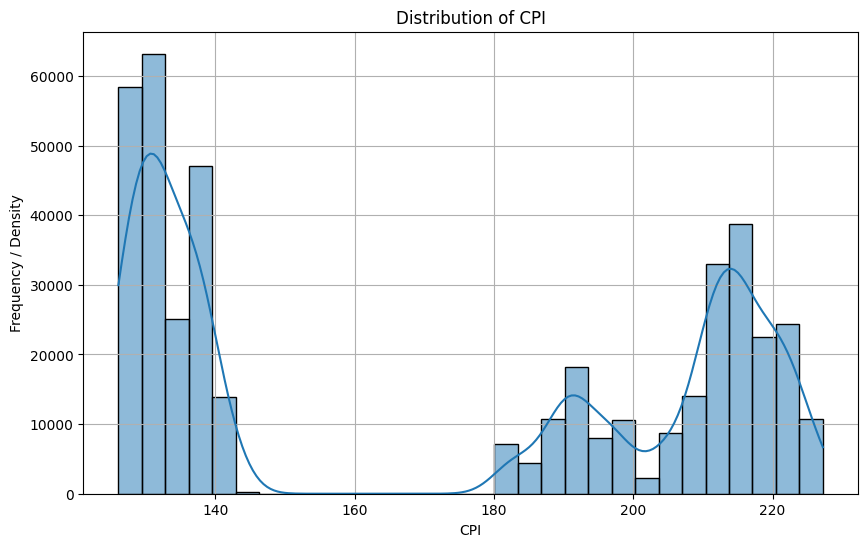

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['CPI'], kde=True, bins=30) # Using bins=30 for better visualization
plt.title('Distribution of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

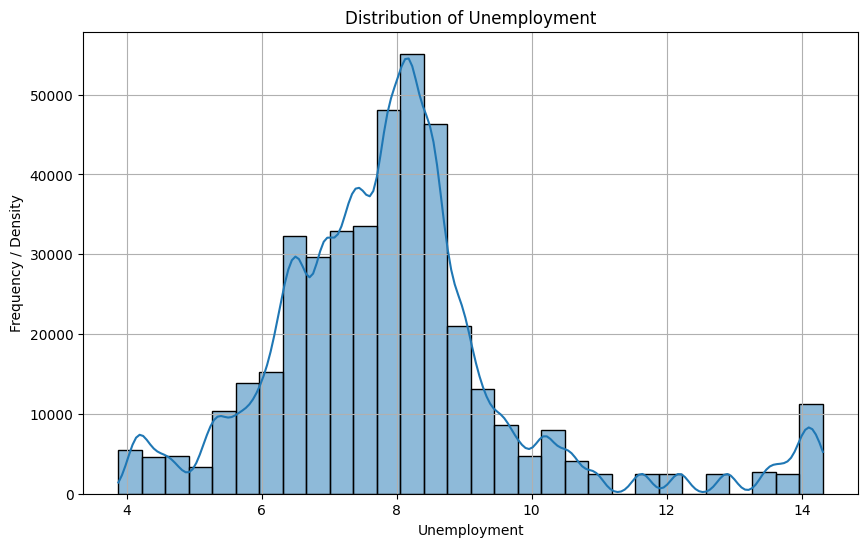

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Unemployment'], kde=True, bins=30)
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

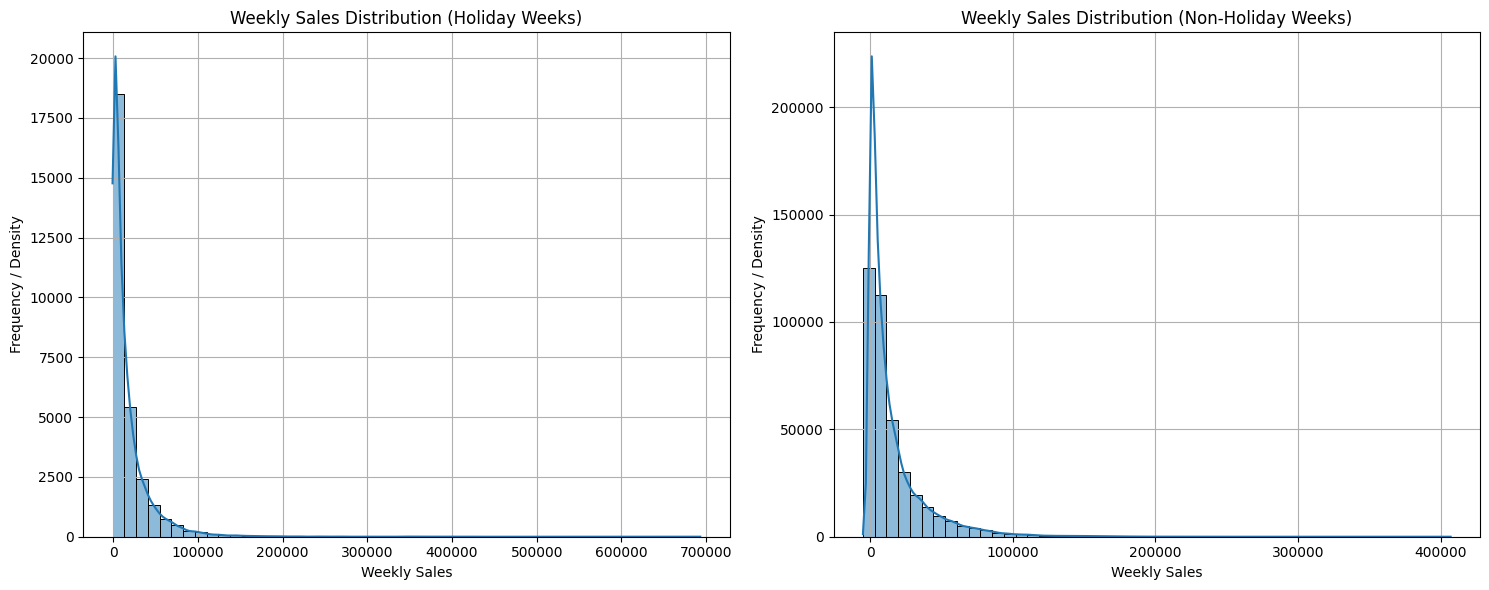

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(merged_df[merged_df['IsHoliday'] == True]['Weekly_Sales'], kde=True, bins=50, ax=axes[0])
axes[0].set_title('Weekly Sales Distribution (Holiday Weeks)')
axes[0].set_xlabel('Weekly Sales')
axes[0].set_ylabel('Frequency / Density')
axes[0].grid(True)

sns.histplot(merged_df[merged_df['IsHoliday'] == False]['Weekly_Sales'], kde=True, bins=50, ax=axes[1])
axes[1].set_title('Weekly Sales Distribution (Non-Holiday Weeks)')
axes[1].set_xlabel('Weekly Sales')
axes[1].set_ylabel('Frequency / Density')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
top_10_departments = merged_df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
print("Top 10 Departments by Average Weekly Sales:")
print(top_10_departments)

Top 10 Departments by Average Weekly Sales:
Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64


Task 5 — Bivariate Analysis

Study the relationship between two variables:

Relationship between Temperature & Weekly Sales (scatter plot).

Relationship between Fuel Price & Weekly Sales.

Weekly Sales vs. Store Type.

Weekly Sales vs. Holiday_Flag.

Compare sales between:

Top-performing store

Lowest-performing store

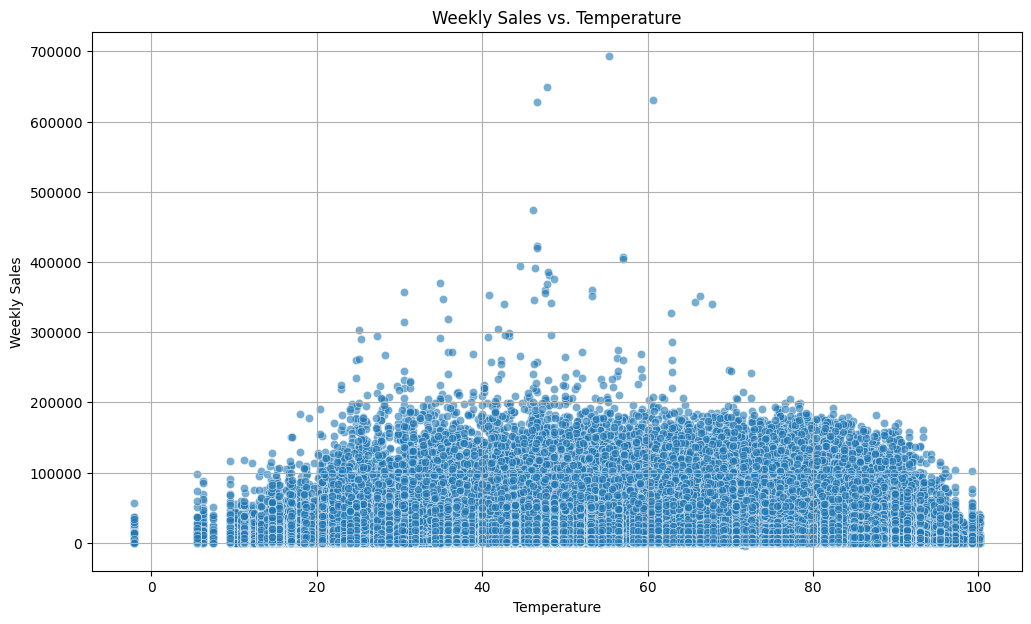

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=merged_df, alpha=0.6)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

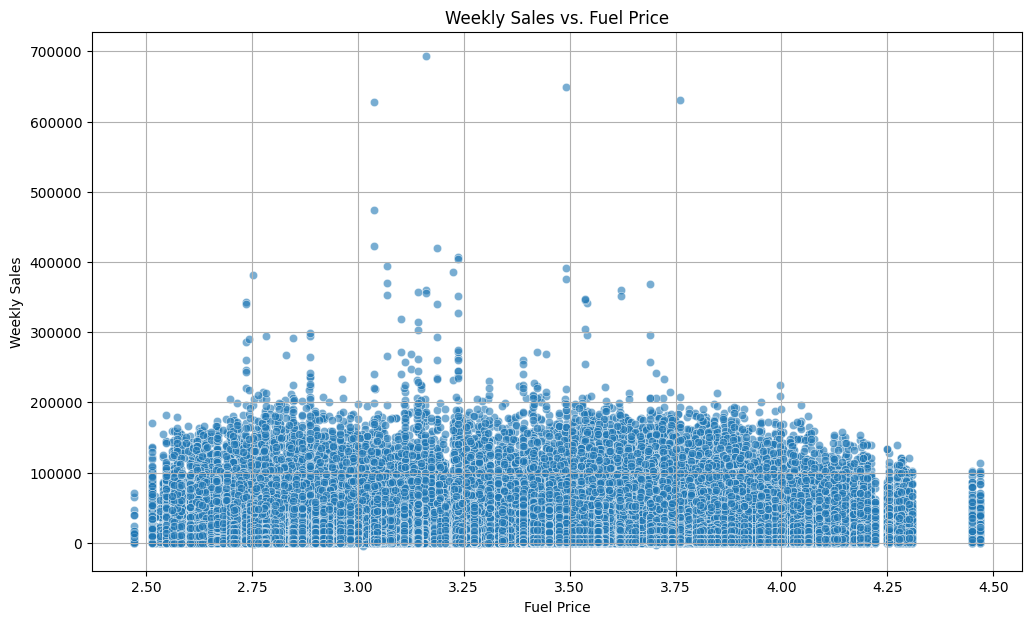

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=merged_df, alpha=0.6)
plt.title('Weekly Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

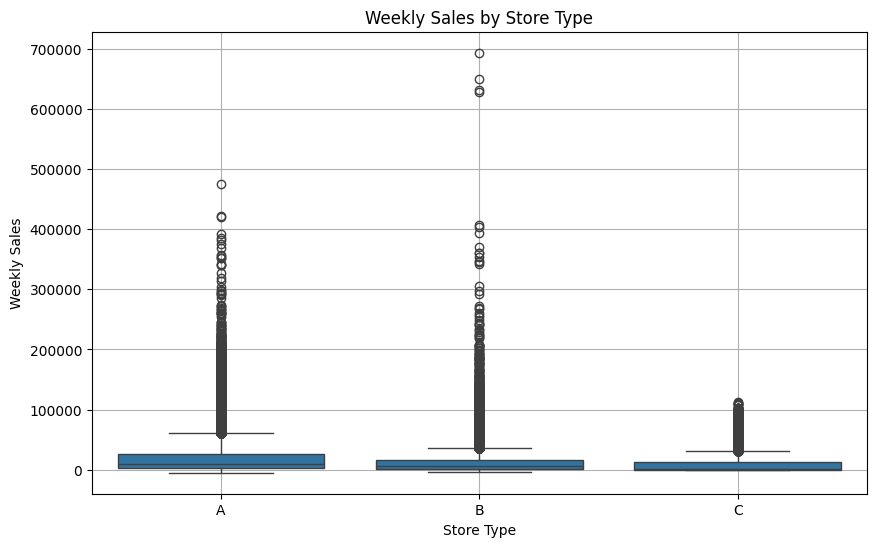

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=merged_df)
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Store with highest average weekly sales: Store 20 (Average Weekly Sales: 29508.30)
Store with lowest average weekly sales: Store 5 (Average Weekly Sales: 5053.42)


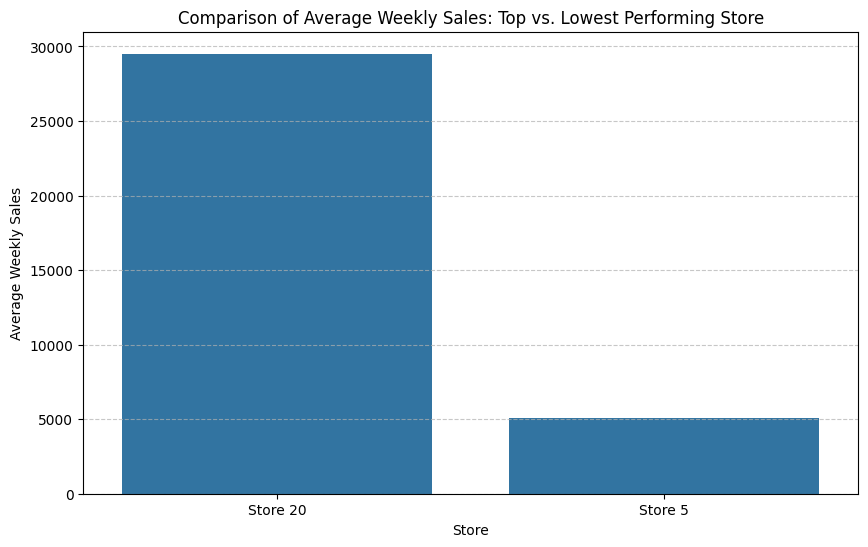

In [ ]:
store_avg_sales = merged_df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

top_store = store_avg_sales.index[0]
lowest_store = store_avg_sales.index[-1]

print(f"Store with highest average weekly sales: Store {top_store} (Average Weekly Sales: {store_avg_sales.iloc[0]:.2f})")
print(f"Store with lowest average weekly sales: Store {lowest_store} (Average Weekly Sales: {store_avg_sales.iloc[-1]:.2f})")

plt.figure(figsize=(10, 6))
sns.barplot(x=[f'Store {top_store}', f'Store {lowest_store}'], y=[store_avg_sales.iloc[0], store_avg_sales.iloc[-1]])
plt.title('Comparison of Average Weekly Sales: Top vs. Lowest Performing Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Task 6 — Multivariate Analysis

Analyze more than two variables together:

Create a correlation heatmap for all numeric features.

Analyze store-level sales using:

Store Type

Store Size

Weekly Sales

Multivariate relationship:

Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)

Analyze whether discount markdowns influence sales when considering:

Date
arkdown v

Store with highest average weekly sales: Store 20 (Average Weekly Sales: 29508.30)
Store with lowest average weekly sales: Store 5 (Average Weekly Sales: 5053.42)


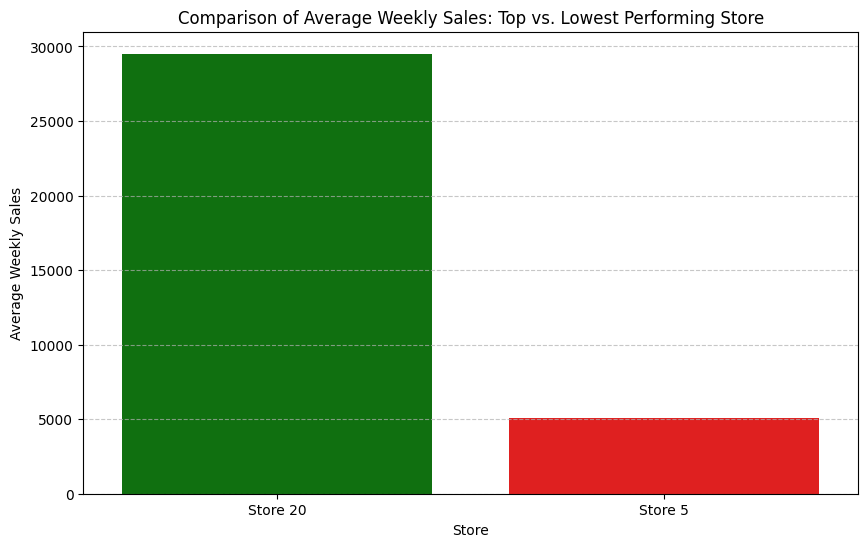

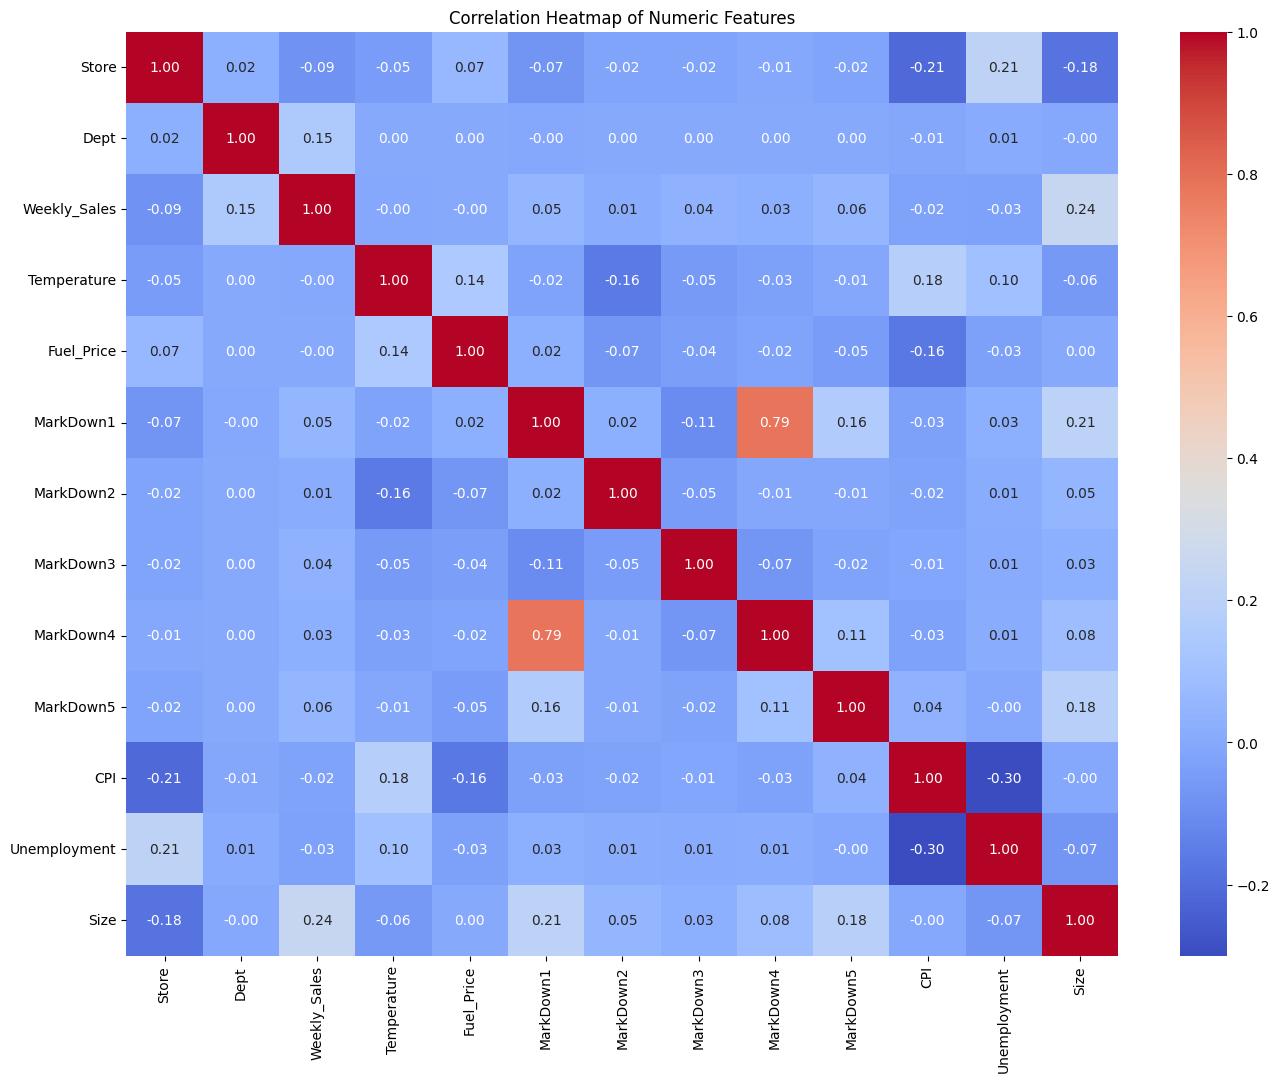

In [ ]:
store_avg_sales = merged_df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

top_store = store_avg_sales.index[0]
lowest_store = store_avg_sales.index[-1]

print(f"Store with highest average weekly sales: Store {top_store} (Average Weekly Sales: {store_avg_sales.iloc[0]:.2f})")
print(f"Store with lowest average weekly sales: Store {lowest_store} (Average Weekly Sales: {store_avg_sales.iloc[-1]:.2f})")

plt.figure(figsize=(10, 6))
# Fix: Assign x to hue and set legend=False to address FutureWarning
sns.barplot(x=[f'Store {top_store}', f'Store {lowest_store}'], y=[store_avg_sales.iloc[0], store_avg_sales.iloc[-1]], hue=[f'Store {top_store}', f'Store {lowest_store}'], palette=['green', 'red'], legend=False)
plt.title('Comparison of Average Weekly Sales: Top vs. Lowest Performing Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Proceeding to Task 6: Create a correlation heatmap for all numeric features.
plt.figure(figsize=(16, 12))
sns.heatmap(merged_df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
print("Multivariate relationship: Weekly Sales vs Temperature vs Holiday_Flag (Grouped Summary)")
summary_sales_temp_holiday = merged_df.groupby('IsHoliday').agg({
    'Weekly_Sales': ['mean', 'median', 'std'],
    'Temperature': ['mean', 'median', 'std']
}).round(2)
print(summary_sales_temp_holiday)

Multivariate relationship: Weekly Sales vs Temperature vs Holiday_Flag (Grouped Summary)
          Weekly_Sales                    Temperature              
                  mean   median       std        mean median    std
IsHoliday                                                          
False         15901.45  7589.95  22330.75       60.88  62.94  18.08
True          17035.82  7947.74  27222.00       49.63  47.30  20.03


In [ ]:
merged_df['Total_MarkDown'] = merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

print("Influence of discount markdowns on sales (Grouped Summary by IsHoliday):")
summary_markdown_sales_holiday = merged_df.groupby('IsHoliday').agg({
    'Weekly_Sales': ['mean', 'median', 'std'],
    'Total_MarkDown': ['mean', 'median', 'std']
}).round(2)
print(summary_markdown_sales_holiday)

Influence of discount markdowns on sales (Grouped Summary by IsHoliday):
          Weekly_Sales                    Total_MarkDown                    
                  mean   median       std           mean    median       std
IsHoliday                                                                   
False         15901.45  7589.95  22330.75       19432.59  20032.61  10020.25
True          17035.82  7947.74  27222.00       27960.70  20032.61  20797.86


Task 7 — Time Series Analysis

Convert Date to:

Year

Month

Week

Plot total weekly sales over time.

Plot monthly sales trends for:

Store with highest sales

Store with lowest sales

Identify seasonal patterns:

Which months show peak sales?

Which departments show seasonal demand?

In [ ]:
merged_df['Year'] = merged_df['Date'].dt.year
print("Year column created:")
print(merged_df[['Date', 'Year']].head())

Year column created:
        Date  Year
0 2010-02-05  2010
1 2010-02-12  2010
2 2010-02-19  2010
3 2010-02-26  2010
4 2010-03-05  2010


In [ ]:
merged_df['Month'] = merged_df['Date'].dt.month
print("Month column created:")
print(merged_df[['Date', 'Month']].head())

Month column created:
        Date  Month
0 2010-02-05      2
1 2010-02-12      2
2 2010-02-19      2
3 2010-02-26      2
4 2010-03-05      3


In [ ]:
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week
print("Week column created:")
print(merged_df[['Date', 'Week']].head())

Week column created:
        Date  Week
0 2010-02-05     5
1 2010-02-12     6
2 2010-02-19     7
3 2010-02-26     8
4 2010-03-05     9


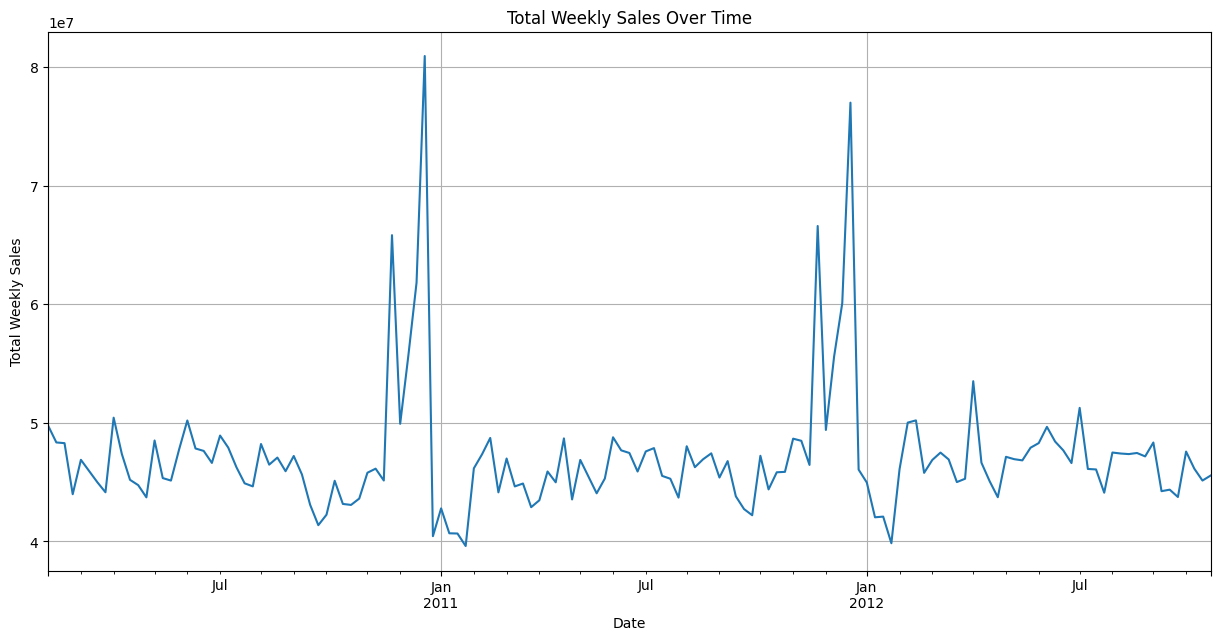

In [ ]:
total_weekly_sales = merged_df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(15, 7))
total_weekly_sales.plot(kind='line')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()


Store with highest total sales: Store 20 (Total Sales: 301397792.46)
Store with lowest total sales: Store 33 (Total Sales: 37160221.96)


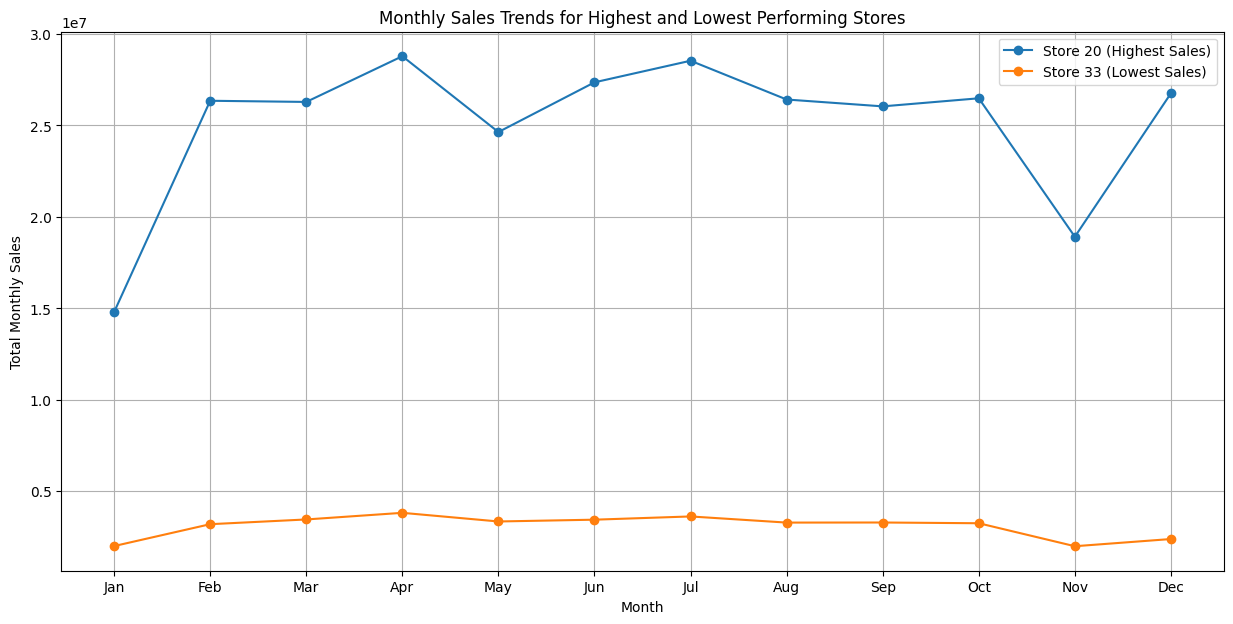

In [ ]:
total_sales_per_store = merged_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

highest_sales_store = total_sales_per_store.index[0]
lowest_sales_store = total_sales_per_store.index[-1]

print(f"Store with highest total sales: Store {highest_sales_store} (Total Sales: {total_sales_per_store.iloc[0]:.2f})")
print(f"Store with lowest total sales: Store {lowest_sales_store} (Total Sales: {total_sales_per_store.iloc[-1]:.2f})")

# Monthly sales for the highest sales store
monthly_sales_highest_store = merged_df[merged_df['Store'] == highest_sales_store].groupby('Month')['Weekly_Sales'].sum()

# Monthly sales for the lowest sales store
monthly_sales_lowest_store = merged_df[merged_df['Store'] == lowest_sales_store].groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(15, 7))
plt.plot(monthly_sales_highest_store.index, monthly_sales_highest_store.values, label=f'Store {highest_sales_store} (Highest Sales)', marker='o')
plt.plot(monthly_sales_lowest_store.index, monthly_sales_lowest_store.values, label=f'Store {lowest_sales_store} (Lowest Sales)', marker='o')

plt.title('Monthly Sales Trends for Highest and Lowest Performing Stores')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

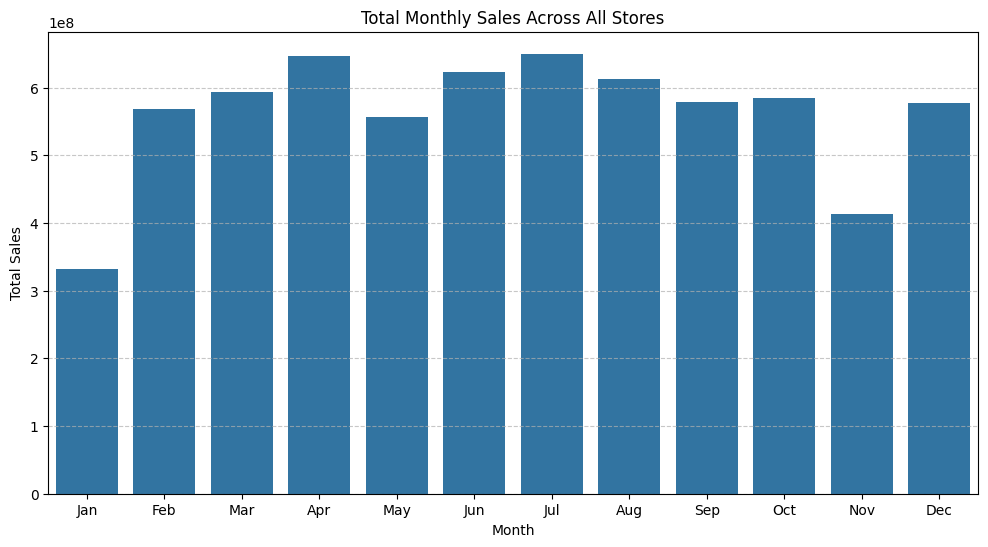

Months with peak sales:
Month
7    6.500010e+08
4    6.468598e+08
6    6.226299e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
monthly_sales = merged_df.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Monthly Sales Across All Stores')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Months with peak sales:")
print(monthly_sales.sort_values(ascending=False).head(3))

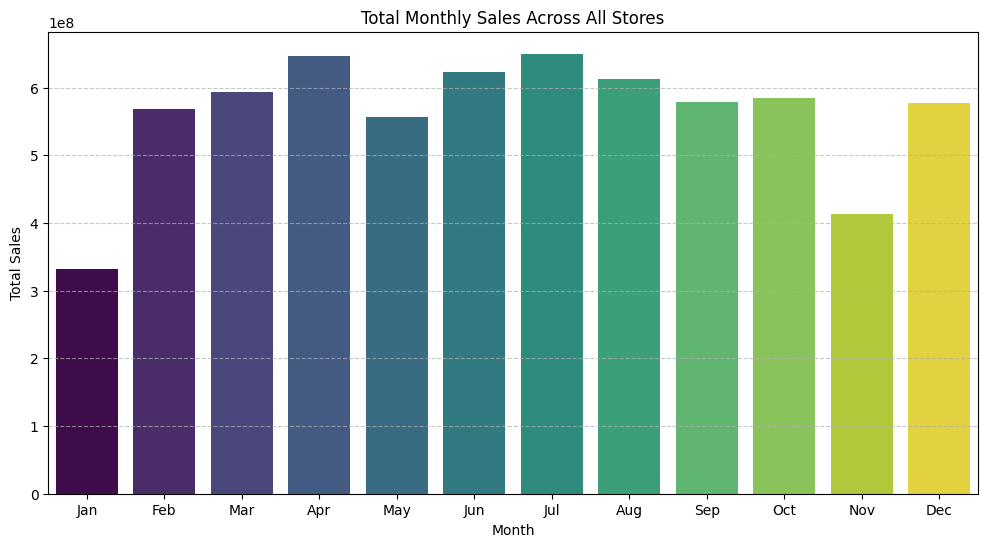

Months with peak sales:
Month
7    6.500010e+08
4    6.468598e+08
6    6.226299e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
monthly_sales = merged_df.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, hue=monthly_sales.index, palette='viridis', legend=False)
plt.title('Total Monthly Sales Across All Stores')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Months with peak sales:")
print(monthly_sales.sort_values(ascending=False).head(3))

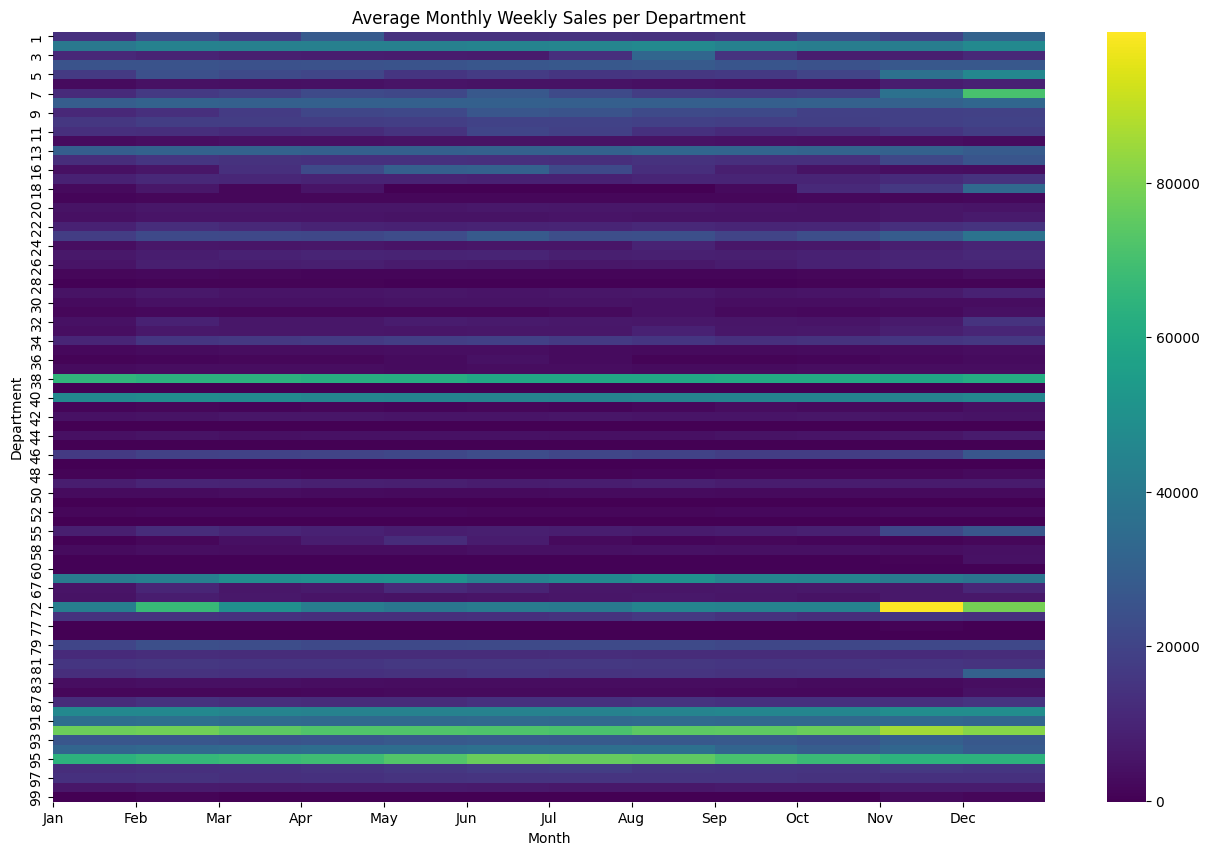

Departments with significant seasonal demand can be identified by observing variations in sales across months in the heatmap.
For a more detailed look, let's select a few departments with high variance for line plots.

Top 5 departments by monthly sales variance (potential seasonal demand): [72, 7, 16, 18, 5]


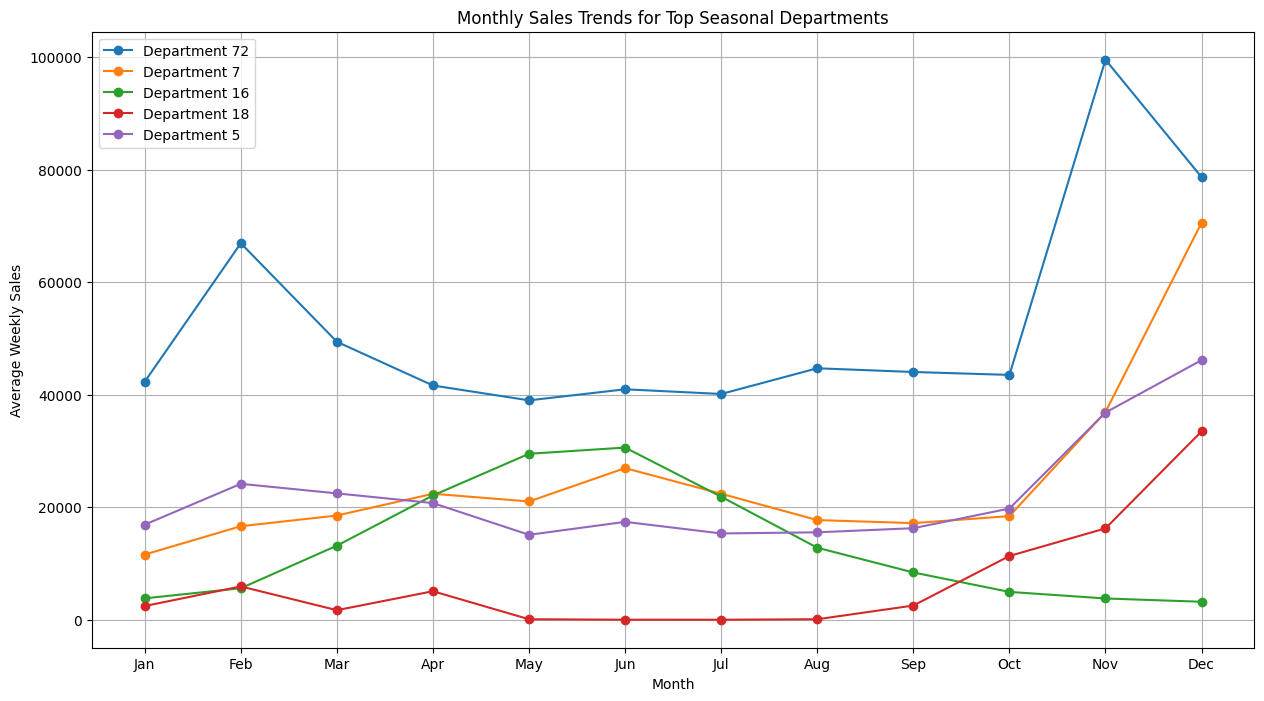

In [ ]:
department_monthly_sales = merged_df.groupby(['Dept', 'Month'])['Weekly_Sales'].mean().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(department_monthly_sales.fillna(0), cmap='viridis', annot=False, fmt=".0f") # Set annot=False to prevent overcrowding if too many departments
plt.title('Average Monthly Weekly Sales per Department')
plt.xlabel('Month')
plt.ylabel('Department')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

print("Departments with significant seasonal demand can be identified by observing variations in sales across months in the heatmap.")
print("For a more detailed look, let's select a few departments with high variance for line plots.")

# Identify departments with high variance in monthly sales to highlight seasonality
department_monthly_sales_variance = department_monthly_sales.var(axis=1).sort_values(ascending=False)
top_seasonal_departments = department_monthly_sales_variance.head(5).index.tolist()

print(f"\nTop 5 departments by monthly sales variance (potential seasonal demand): {top_seasonal_departments}")

# Plot monthly sales for these top seasonal departments
plt.figure(figsize=(15, 8))
for dept in top_seasonal_departments:
    plt.plot(department_monthly_sales.loc[dept].index, department_monthly_sales.loc[dept].values, marker='o', label=f'Department {dept}')
plt.title('Monthly Sales Trends for Top Seasonal Departments')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

Task 8 — Feature Engineering


Task 8A — Create New Columns

year, month, week → from date.

discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5

is_peak_season → True if month in {11, 12}.

normalized_sales = Weekly_Sales / Size

In [ ]:
merged_df['discount_effect'] = merged_df['MarkDown1'] + merged_df['MarkDown2'] + merged_df['MarkDown3'] + merged_df['MarkDown4'] + merged_df['MarkDown5']
print("New column 'discount_effect' created:")
print(merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'discount_effect']].head())

New column 'discount_effect' created:
     MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5  \
0  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
1  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
2  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
3  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   
4  7246.420196  3334.628621  1439.421384  3383.168256  4628.975079   

   discount_effect  
0     20032.613536  
1     20032.613536  
2     20032.613536  
3     20032.613536  
4     20032.613536  


In [ ]:
merged_df['is_peak_season'] = merged_df['Month'].isin([11, 12])
print("New column 'is_peak_season' created:")
print(merged_df[['Date', 'Month', 'is_peak_season']].head())

New column 'is_peak_season' created:
        Date  Month  is_peak_season
0 2010-02-05      2           False
1 2010-02-12      2           False
2 2010-02-19      2           False
3 2010-02-26      2           False
4 2010-03-05      3           False


In [ ]:
merged_df['normalized_sales'] = merged_df['Weekly_Sales'] / merged_df['Size']
print("New column 'normalized_sales' created:")
print(merged_df[['Weekly_Sales', 'Size', 'normalized_sales']].head())

New column 'normalized_sales' created:
   Weekly_Sales    Size  normalized_sales
0      24924.50  151315          0.164719
1      46039.49  151315          0.304263
2      41595.55  151315          0.274894
3      19403.54  151315          0.128233
4      21827.90  151315          0.144255


Task 8B — Filter Using Created Columns

Show all peak-season transactions where weekly_sales > 50,000Show all stores
whose normalized_sales is in the top 10% percentile.

Show departments where discount_effect > median discount.

Filter rows where:

Temperature < 40

Fuel price > 3.5

Weekly sales between 20,000 and 60,000

is_peak_season = True

In [ ]:
peak_season_high_sales = merged_df[(merged_df['is_peak_season'] == True) & (merged_df['Weekly_Sales'] > 50000)]
print("Peak-season transactions with Weekly_Sales > 50,000:")
print(peak_season_high_sales.head())

Peak-season transactions with Weekly_Sales > 50,000:
     Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
46       1     1 2010-12-24      55931.23      False        52.33       2.886   
189      1     2 2010-12-24      59889.32      False        52.33       2.886   
240      1     2 2011-12-16      51137.42      False        51.63       3.159   
241      1     2 2011-12-23      65615.36      False        47.96       3.112   
614      1     5 2010-11-26      70158.86       True        64.52       2.735   

       MarkDown1    MarkDown2    MarkDown3  ...  Unemployment  Type    Size  \
46   7246.420196  3334.628621  1439.421384  ...         7.838     A  151315   
189  7246.420196  3334.628621  1439.421384  ...         7.838     A  151315   
240  5011.320000    67.000000   347.370000  ...         7.866     A  151315   
241  2725.360000    40.480000   634.700000  ...         7.866     A  151315   
614  7246.420196  3334.628621  1439.421384  ...         7.838    

In [ ]:
top_10_percentile = merged_df['normalized_sales'].quantile(0.90)

top_stores_normalized_sales = merged_df[merged_df['normalized_sales'] >= top_10_percentile]

print(f"Stores with normalized_sales in the top 10% percentile (threshold: {top_10_percentile:.4f}):")
print(top_stores_normalized_sales.head())

Stores with normalized_sales in the top 10% percentile (threshold: 0.3328):
     Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
8        1     1 2010-04-02      57258.43      False        62.27       2.719   
46       1     1 2010-12-24      55931.23      False        52.33       2.886   
63       1     1 2011-04-22      50510.31      False        72.99       3.807   
106      1     1 2012-02-17      54060.10      False        45.32       3.510   
113      1     1 2012-04-06      57592.12      False        70.43       3.891   

        MarkDown1     MarkDown2    MarkDown3  ...  Unemployment  Type    Size  \
8     7246.420196   3334.628621  1439.421384  ...         7.808     A  151315   
46    7246.420196   3334.628621  1439.421384  ...         7.838     A  151315   
63    7246.420196   3334.628621  1439.421384  ...         7.682     A  151315   
106   9873.330000  11062.270000     9.800000  ...         7.348     A  151315   
113  10121.970000   3334.628621 

In [ ]:
median_discount_effect = merged_df['discount_effect'].median()

departments_above_median_discount = merged_df[merged_df['discount_effect'] > median_discount_effect]

print(f"Departments where discount_effect > median discount ({median_discount_effect:.2f}):")
print(departments_above_median_discount[['Dept', 'discount_effect', 'Weekly_Sales']].head())

Departments where discount_effect > median discount (20032.61):
    Dept  discount_effect  Weekly_Sales
92     1         25671.68      18689.54
94     1         56876.74      20911.25
95     1         29655.58      25293.49
96     1         22865.91      33305.92
99     1         57753.27      23350.88


In [ ]:
filtered_complex_conditions = merged_df[
    (merged_df['Temperature'] < 40) &
    (merged_df['Fuel_Price'] > 3.5) &
    (merged_df['Weekly_Sales'].between(20000, 60000)) &
    (merged_df['is_peak_season'] == True)
]

print("Rows filtered by complex conditions (Temperature < 40, Fuel_Price > 3.5, Weekly_Sales between 20k-60k, is_peak_season=True):")
print(filtered_complex_conditions.head())

Rows filtered by complex conditions (Temperature < 40, Fuel_Price > 3.5, Weekly_Sales between 20k-60k, is_peak_season=True):
       Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
59234      7     2 2011-11-04      21320.52      False        23.41   
60235      7     9 2011-11-04      28969.99      False        23.41   
60378      7    10 2011-11-04      28281.31      False        23.41   
60379      7    10 2011-11-11      23758.50      False        19.53   
60522      7    11 2011-11-11      20611.14      False        19.53   

       Fuel_Price    MarkDown1    MarkDown2    MarkDown3  ...  Unemployment  \
59234       3.527  7246.420196  3334.628621  1439.421384  ...         8.513   
60235       3.527  7246.420196  3334.628621  1439.421384  ...         8.513   
60378       3.527  7246.420196  3334.628621  1439.421384  ...         8.513   
60379       3.505  3307.600000  1431.650000   143.060000  ...         8.513   
60522       3.505  3307.600000  1431.650000   143.060

Task 8C — Grouping & Business Insights

Monthly average sales per store.

Total discount_effect per department.

Department with highest normalized_sales.

Compute store-wise revenue potential:

revenue_potential = Weekly_Sales * 52

Identify top 10 stores based on revenue potential.

In [ ]:
monthly_avg_sales_per_store = merged_df.groupby(['Store', 'Month'])['Weekly_Sales'].mean().reset_index()
print("Monthly average sales per store:")
print(monthly_avg_sales_per_store.head())

Monthly average sales per store:
   Store  Month  Weekly_Sales
0      1      1  19586.960647
1      1      2  22497.470104
2      1      3  21750.978506
3      1      4  21601.538801
4      1      5  21669.008080


In [ ]:
total_discount_effect_per_dept = merged_df.groupby('Dept')['discount_effect'].sum().reset_index()
print("Total discount_effect per department:")
print(total_discount_effect_per_dept.head())

Total discount_effect per department:
   Dept  discount_effect
0     1     1.270458e+08
1     2     1.270458e+08
2     3     1.270458e+08
3     4     1.270458e+08
4     5     1.252829e+08


In [ ]:
department_normalized_sales = merged_df.groupby('Dept')['normalized_sales'].mean().reset_index()
highest_normalized_sales_dept = department_normalized_sales.loc[department_normalized_sales['normalized_sales'].idxmax()]

print("Department with highest normalized sales:")
print(highest_normalized_sales_dept)

Department with highest normalized sales:
Dept                92.000000
normalized_sales     0.641547
Name: 73, dtype: float64


In [ ]:
merged_df['revenue_potential'] = merged_df['Weekly_Sales'] * 52
print("New column 'revenue_potential' created:")
print(merged_df[['Store', 'Weekly_Sales', 'revenue_potential']].head())

New column 'revenue_potential' created:
   Store  Weekly_Sales  revenue_potential
0      1      24924.50         1296074.00
1      1      46039.49         2394053.48
2      1      41595.55         2162968.60
3      1      19403.54         1008984.08
4      1      21827.90         1135050.80


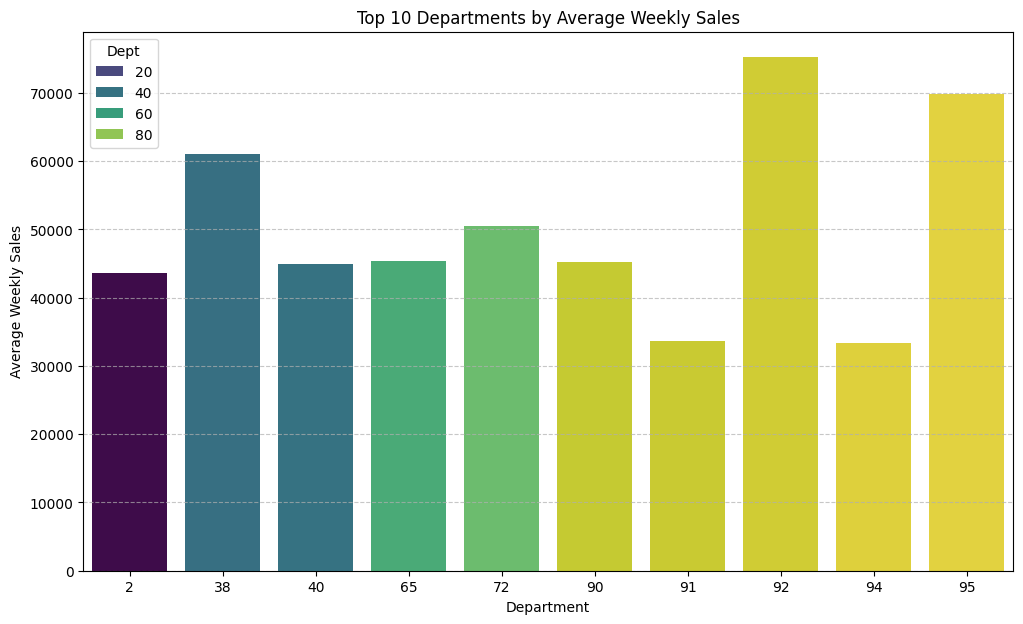

In [72]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_departments.index, y=top_10_departments.values,hue=top_10_departments.index,palette='viridis')
plt.title('Top 10 Departments by Average Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
top_10_stores_revenue = merged_df.groupby('Store')['revenue_potential'].sum().nlargest(10)
print("Top 10 stores based on total revenue potential:")
print(top_10_stores_revenue)

Top 10 stores based on total revenue potential:
Store
20    1.567269e+10
4     1.557629e+10
14    1.502800e+10
13    1.489892e+10
2     1.431989e+10
10    1.412412e+10
27    1.320051e+10
6     1.163532e+10
1     1.156495e+10
39    1.078717e+10
Name: revenue_potential, dtype: float64


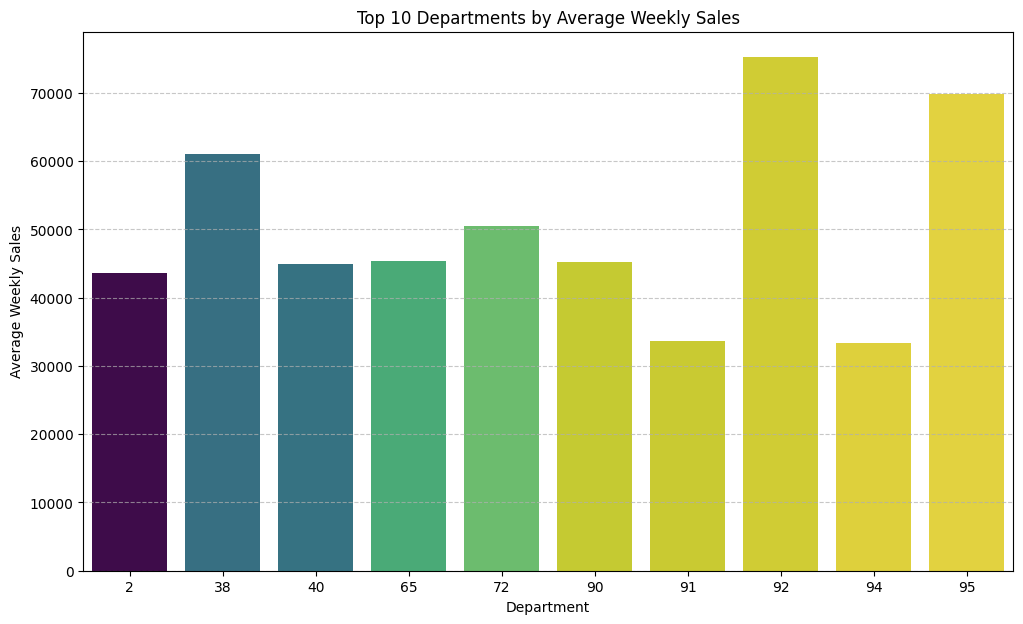

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_departments.index, y=top_10_departments.values, hue=top_10_departments.index, palette='viridis', legend=False)
plt.title('Top 10 Departments by Average Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()